# Predicting the Outcome of Cricket Matches

### Prediction Model

  * Logistic Regression using sklearn
  * K-Nearest Neighbors using sklearn
  

In [1]:
%matplotlib inline 
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from patsy import dmatrices

/Users/gursahej/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
matches = pd.read_csv("../data/matcheswithfeatures.csv", index_col = 0)

In [3]:
y, X = dmatrices('team1Winning ~ 0 + Avg_SR_Difference + Avg_WPR_Difference + Total_MVP_Difference + Prev_Enc_Team1_WinPerc + \
                  Total_RF_Difference', matches, return_type="dataframe")
y_arr = np.ravel(y)

### Training and Testing on Entire Data

In [4]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y_arr)
# check the accuracy on the training set
print "Accuracy is", model.score(X, y_arr)*100, "%"

Accuracy is 57.4923547401 %


### Splitting train and test using train_test_split

In [5]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_arr, random_state = 0)

In [6]:
# Logistic Regression on train_test_split
model2 = LogisticRegression()
model2.fit(X_train, y_train)
# predict class labels for the test set
predicted = model2.predict(X_test)
# generate evaluation metrics
print "Accuracy is ", metrics.accuracy_score(y_test, predicted)*100, "%"

Accuracy is  58.5365853659 %


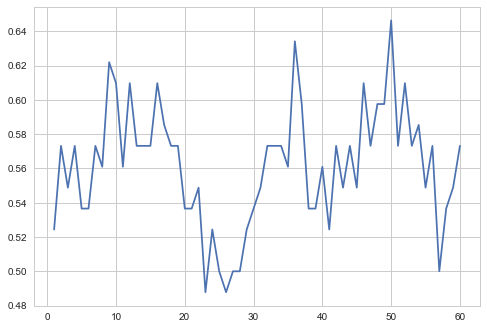

In [7]:
# KNN Classification on train_test_split
k_range = list(range(1, 61))
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_score.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, k_score)

In [8]:
# Best values of k in train_test_split
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print "Accuracy is ", metrics.accuracy_score(y_test, y_pred)*100, "%" 

Accuracy is  64.6341463415 %


### Splitting Training Set (2008-2013) and Test Set (2013-2015) based on Seasons

In [9]:
X_timetrain = X.loc[X.index < 398]
Y_timetrain = y.loc[y.index < 398]
Y_timetrain_arr = np.ravel(Y_timetrain)
X_timetest = X.loc[X.index >= 398]
Y_timetest = y.loc[y.index >= 398]
Y_timetest_arr = np.ravel(Y_timetest)

In [10]:
# Logistic Regression on time-based split sets
model3 = LogisticRegression()
model3.fit(X_timetrain, Y_timetrain_arr)
timepredicted = model3.predict(X_timetest)
print "Accuracy is ", metrics.accuracy_score(Y_timetest_arr, timepredicted)*100, "%"

Accuracy is  52.8735632184 %


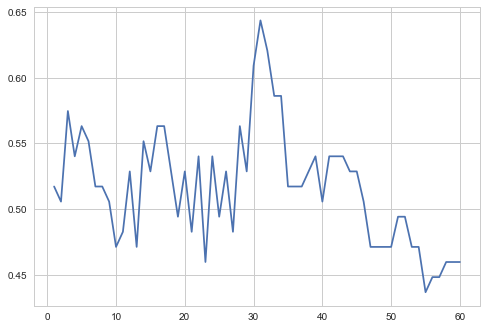

In [11]:
# KNN Classification on time-based split sets
k_range = list(range(1, 61))
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_timetrain, Y_timetrain_arr)
    y_pred = knn.predict(X_timetest)
    k_score.append(metrics.accuracy_score(Y_timetest_arr, y_pred))
plt.plot(k_range, k_score)  

In [12]:
# Best values of k in time-based split data
knn1 = KNeighborsClassifier(n_neighbors = 31)
knn1.fit(X_timetrain, Y_timetrain_arr)
y_pred = knn1.predict(X_timetest)
print "Accuracy is ", metrics.accuracy_score(Y_timetest_arr, y_pred)*100, "%"

Accuracy is  64.367816092 %


### Support Vector Machines

In [13]:
clf = svm.SVC(gamma=0.001, C=10)
clf.fit(X_timetrain, Y_timetrain_arr)
clf_pred = clf.predict(X_timetest)
print "Accuracy is ", metrics.accuracy_score(Y_timetest_arr, clf_pred)*100, "%"

Accuracy is  45.9770114943 %


### Random Forests

In [14]:
rfc = RandomForestClassifier(n_jobs = -1, random_state = 1)
rfc.fit(X_timetrain, Y_timetrain_arr)
rfc_pred = rfc.predict(X_timetest)
print "Accuracy is ", metrics.accuracy_score(Y_timetest_arr, rfc_pred)*100, "%"

Accuracy is  54.0229885057 %


In [15]:
fi = zip(X.columns, rfc.feature_importances_)
print "Feature Importance according to Random Forests Model\n"
for i in fi:
    print i[0], ":", i[1]

Feature Importance according to Random Forests Model

Avg_SR_Difference : 0.330684992918
Avg_WPR_Difference : 0.21317276792
Total_MVP_Difference : 0.191778034092
Prev_Enc_Team1_WinPerc : 0.141146504197
Total_RF_Difference : 0.123217700874


### Naive Bayes Classifier

In [16]:
gclf = GaussianNB()
gclf.fit(X_timetrain, Y_timetrain_arr)
gclf_pred = gclf.predict(X_timetest)
print "Accuracy is ", metrics.accuracy_score(Y_timetest_arr, gclf_pred) *100, "%"

Accuracy is  55.1724137931 %


### Cross Validation

In [17]:
from sklearn.cross_validation import cross_val_score

In [18]:
rfc = LogisticRegression()
scores = cross_val_score(rfc, X, y_arr, cv=10, scoring='accuracy')
scores

array([ 0.48484848,  0.57575758,  0.60606061,  0.48484848,  0.51515152,
        0.66666667,  0.48484848,  0.45454545,  0.5       ,  0.41935484])

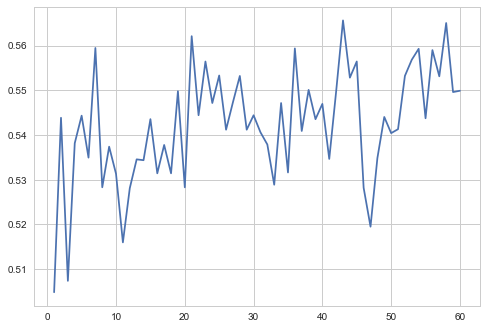

In [19]:
k_range = list(range(1, 61))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_arr, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)

In [20]:
def getPrediction(match_id):
    '''Returns the prediction for the given match
    
    Args: match_id (int): Match ID for the required game
    
    Returns: String: Predicted winner of the game and probability of victory 
    '''
    results = {}
    match_row = matches.loc[matches['id'] == match_id]
    team1name = match_row.team1.unique()[0]
    team2name = match_row.team2.unique()[0]
    toPredict = X_timetest.loc[X_timetest.index == match_id-1].values
    prediction_prob = knn1.predict_proba(toPredict)
    prediction = knn1.predict(toPredict)
    if prediction[0] > 0:
        results['name'] = str(team1name)
        results['prob'] = float(prediction_prob[0][1])*100
    else:
        results['name'] = str(team2name)
        results['prob'] = float(prediction_prob[0][0])*100
    return results

In [26]:
getPrediction(517)

{'name': 'Mumbai Indians', 'prob': 51.61290322580645}